In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#AMST data are generally available in two formats: antibiotics in rows (long format) and antibiotics in columns (wide format)
#Loading both the datasets
long_df = pd.read_csv('data_long.csv')
wide_df = pd.read_csv('data_wide.csv')

In [3]:
#Quick look at the datasets
def peek(df, name):
    print(f"--- {name} sample ({df.shape[0]} rows, {df.shape[1]} cols) ---")
    print(df.head(), "\n")

peek(long_df, 'Long format')

--- Long format sample (19 rows, 12 cols) ---
   ID date of sample collection type of sample date of admission  department  \
0  A1                  01/01/17          Blood          31/12/16  Hepatology   
1  A1                  01/01/17          Blood          31/12/16  Hepatology   
2  A1                  01/01/17          Blood          31/12/16  Hepatology   
3  A2                  01/01/17          Blood          31/12/16  Hepatology   
4  A2                  01/01/17          Blood          31/12/16  Hepatology   

  location in hospital  gender       dob location  DD_Values  \
0                 Ward    male  31/12/48        A         25   
1                 Ward    male  31/12/48        A         27   
2                 Ward    male  31/12/48        A         22   
3                 Ward  female  31/12/48        A         11   
4                 Ward  female  31/12/48        A         10   

               antibiotic          organism  
0                Amikacin  Escherichia col

In [4]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         19 non-null     object
 1   date of sample collection  19 non-null     object
 2   type of sample             19 non-null     object
 3   date of admission          19 non-null     object
 4   department                 19 non-null     object
 5   location in hospital       19 non-null     object
 6   gender                     19 non-null     object
 7   dob                        19 non-null     object
 8   location                   19 non-null     object
 9   DD_Values                  19 non-null     int64 
 10  antibiotic                 19 non-null     object
 11  organism                   19 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.9+ KB


In [5]:
peek(wide_df, 'Wide format')

--- Wide format sample (9984 rows, 49 cols) ---
  Study                  Species                  Family Country State  \
0     C    Staphylococcus aureus      Staphylococcus spp      Z1   NaN   
1     A   Haemophilus influenzae         Haemophilus spp      Z7    Y3   
2     A       Klebsiella oxytoca      Enterobacteriaceae      Z3   NaN   
3     C         Escherichia coli        Enterobacterales     Z24   NaN   
4     C  Acinetobacter baumannii  Non-Enterobacteriaceae     Z11   NaN   

   Gender       Age.Group        Speciality  Source In...Out.Patient  ...  \
0  Female  19 to 64 Years      Medicine ICU  Sputum              NaN  ...   
1  Female     85 and Over    Emergency Room  Sputum        Inpatient  ...   
2    Male  19 to 64 Years   Surgery General  Sputum        Inpatient  ...   
3    Male  65 to 84 Years    Emergency Room   Urine              NaN  ...   
4    Male  65 to 84 Years  Medicine General   Urine       None Given  ...   

   Ciprofloxacin_I    Colistin_I Daptomycin_

In [6]:
wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Study                      9984 non-null   object 
 1   Species                    9984 non-null   object 
 2   Family                     9984 non-null   object 
 3   Country                    9984 non-null   object 
 4   State                      1707 non-null   object 
 5   Gender                     9635 non-null   object 
 6   Age.Group                  9984 non-null   object 
 7   Speciality                 9984 non-null   object 
 8   Source                     9984 non-null   object 
 9   In...Out.Patient           7489 non-null   object 
 10  Year                       9984 non-null   int64  
 11  Phenotype                  2676 non-null   object 
 12  Amikacin_I                 5785 non-null   object 
 13  Amoxycillin.clavulanate_I  4829 non-null   objec

In [7]:
# Lets check the antibiotic values in the dataset. The dataset may contain pre-categorised antibiotic values as Resistant, Susceptible or Intermediate. If you have the raw Disk Diffusion (DD) or MIC values, you can convert to R/I/S based on CLSI or EUCAST guidelines.

#Upload guidelines fromcsv
guidelines = pd.read_csv('breakpoint.csv')

#An easy method is to merge breakpoints to the original data and compare. Without merging comparison is also possible.
merged_df = long_df.merge(guidelines, on=['organism', 'antibiotic'], how='left')

print (merged_df)

# Function to classify AST result based on disk diffusion (DD) values
def classify(row):
    """
    Return:
      - 'Susceptible' if DD_Values ≥ s_dd
      - 'Resistant'   if DD_Values ≤ r_dd
      - 'Intermediate' otherwise
    """
    dd = row['DD_Values']
    s  = row['s_dd']
    r  = row['r_dd']

    # If any of the key values are missing, we can’t classify
    if pd.isnull(dd) or pd.isnull(s) or pd.isnull(r):
        return np.nan

    # Order matters: check Susceptible first, then Resistant, then Intermediate
    if dd >= s:
        return 'Susceptible'
    elif dd <= r:
        return 'Resistant'
    else:
        return 'Intermediate'

merged_df['category'] = merged_df.apply(classify, axis=1)

    ID date of sample collection type of sample date of admission  department  \
0   A1                  01/01/17          Blood          31/12/16  Hepatology   
1   A1                  01/01/17          Blood          31/12/16  Hepatology   
2   A1                  01/01/17          Blood          31/12/16  Hepatology   
3   A2                  01/01/17          Blood          31/12/16  Hepatology   
4   A2                  01/01/17          Blood          31/12/16  Hepatology   
5   A2                  01/01/17          Blood          31/12/16  Hepatology   
6   A2                  01/01/17          Blood          31/12/16  Hepatology   
7   A2                  01/01/17          Blood          31/12/16  Hepatology   
8   A3                  01/01/17          Blood          01/01/17  Nephrology   
9   A3                  01/01/17          Blood          01/01/17  Nephrology   
10  A3                  01/01/17          Blood          01/01/17  Nephrology   
11  A3                  01/0

In [8]:
merged_df['category'].value_counts()

,count
category,
Susceptible,8
Resistant,7
Intermediate,2


In [9]:
# Converting to antibiotics as columns
wide_from_long = merged_df.pivot_table(
    index=['ID', 'organism'],
    columns='antibiotic',
    values='category',
    aggfunc='first'
).reset_index()

print(wide_from_long.head())

antibiotic  ID               organism     Amikacin   Cefepime   Cefotaxime  \
0           A1       Escherichia coli  Susceptible        NaN          NaN   
1           A2       Escherichia coli          NaN        NaN          NaN   
2           A3  Klebsiella pneumoniae    Resistant  Resistant  Susceptible   
3           A4  Klebsiella pneumoniae          NaN        NaN          NaN   

antibiotic   Ceftazidime Ciprofloxacin Doxycycline    Ertapenem     Imipenem  \
0                    NaN  Intermediate         NaN          NaN          NaN   
1                    NaN           NaN   Resistant    Resistant  Susceptible   
2                    NaN           NaN         NaN          NaN          NaN   
3           Intermediate   Susceptible   Resistant  Susceptible  Susceptible   

antibiotic    Meropenem Piperacillin-tazobactam  
0                   NaN                     NaN  
1             Resistant             Susceptible  
2                   NaN                     NaN  
3       

In [10]:
#Cleaning & preprocessing the wide dataset
data = wide_df.copy()
data

,Study,Species,Family,Country,State,Gender,Age.Group,Speciality,Source,In...Out.Patient,...,Ciprofloxacin_I,Colistin_I,Daptomycin_I,Doripenem_I,Ertapenem_I,Sulbactam,Teicoplanin_I,Tetracycline_I,Cefpodoxime_I,Ceftibuten_I
0,C,Staphylococcus aureus,Staphylococcus spp,Z1,NaN,Female,19 to 64 Years,Medicine ICU,Sputum,NaN,...,Susceptible,Intermediate,Susceptible,NaN,NaN,NaN,Susceptible,NaN,NaN,NaN
1,A,Haemophilus influenzae,Haemophilus spp,Z7,Y3,Female,85 and Over,Emergency Room,Sputum,Inpatient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Klebsiella oxytoca,Enterobacteriaceae,Z3,NaN,Male,19 to 64 Years,Surgery General,Sputum,Inpatient,...,NaN,NaN,NaN,NaN,Susceptible,NaN,NaN,NaN,NaN,NaN
3,C,Escherichia coli,Enterobacterales,Z24,NaN,Male,65 to 84 Years,Emergency Room,Urine,NaN,...,NaN,Intermediate,Susceptible,NaN,NaN,NaN,NaN,NaN,NaN,Susceptible
4,C,Acinetobacter baumannii,Non-Enterobacteriaceae,Z11,NaN,Male,65 to 84 Years,Medicine General,Urine,None Given,...,Resistant,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,C,Pseudomonas aeruginosa,Non-Enterobacteriaceae,Z6,NaN,Male,65 to 84 Years,Surgery General,Blood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9980,A,Escherichia coli,Enterobacteriaceae,Z45,NaN,Female,19 to 64 Years,Emergency Room,Tissue Fluid,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9981,A,Enterococcus faecium,Enterococcus spp,Z7,Y11,Male,65 to 84 Years,Medicine General,Blood,Inpatient,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,A,Acinetobacter lwoffii,Non-Enterobacteriaceae,Z1,NaN,Female,19 to 64 Years,Medicine General,Peritoneal Fluid,None Given,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(data)

9984

In [12]:
#Clean column names
data.columns = (
    data.columns
      .str.strip()
      .str.lower()
      .str.replace('[^0-9a-z]+', '_', regex=True)
)

In [13]:
data.columns

Index(['study', 'species', 'family', 'country', 'state', 'gender', 'age_group',
       'speciality', 'source', 'in_out_patient', 'year', 'phenotype',
       'amikacin_i', 'amoxycillin_clavulanate_i', 'ampicillin_i',
       'azithromycin_i', 'cefepime_i', 'cefoxitin_i', 'ceftazidime_i',
       'ceftriaxone_i', 'clarithromycin_i', 'clindamycin_i', 'erythromycin_i',
       'imipenem_i', 'levofloxacin_i', 'linezolid_i', 'meropenem_i',
       'metronidazole', 'metronidazole_i', 'minocycline_i', 'penicillin_i',
       'piperacillin_tazobactam_i', 'tigecycline_i', 'vancomycin_i',
       'ampicillin_sulbactam_i', 'aztreonam_i', 'cefixime_i', 'ceftaroline_i',
       'ceftazidime_avibactam_i', 'ciprofloxacin_i', 'colistin_i',
       'daptomycin_i', 'doripenem_i', 'ertapenem_i', 'sulbactam',
       'teicoplanin_i', 'tetracycline_i', 'cefpodoxime_i', 'ceftibuten_i'],
      dtype='object')

In [14]:
#Identify missingness
for col in data.columns:
    cnt = data[col].isnull().sum()
    pct = data[col].isnull().mean() * 100
    print(f"{col}: {cnt} missing ({pct:.2f}%)")

study: 0 missing (0.00%)
species: 0 missing (0.00%)
family: 0 missing (0.00%)
country: 0 missing (0.00%)
state: 8277 missing (82.90%)
gender: 349 missing (3.50%)
age_group: 0 missing (0.00%)
speciality: 0 missing (0.00%)
source: 0 missing (0.00%)
in_out_patient: 2495 missing (24.99%)
year: 0 missing (0.00%)
phenotype: 7308 missing (73.20%)
amikacin_i: 4199 missing (42.06%)
amoxycillin_clavulanate_i: 5155 missing (51.63%)
ampicillin_i: 4836 missing (48.44%)
azithromycin_i: 9664 missing (96.79%)
cefepime_i: 3895 missing (39.01%)
cefoxitin_i: 9906 missing (99.22%)
ceftazidime_i: 4849 missing (48.57%)
ceftriaxone_i: 6059 missing (60.69%)
clarithromycin_i: 9752 missing (97.68%)
clindamycin_i: 7633 missing (76.45%)
erythromycin_i: 7587 missing (75.99%)
imipenem_i: 6343 missing (63.53%)
levofloxacin_i: 241 missing (2.41%)
linezolid_i: 6409 missing (64.19%)
meropenem_i: 3155 missing (31.60%)
metronidazole: 9787 missing (98.03%)
metronidazole_i: 9781 missing (97.97%)
minocycline_i: 5373 missing

In [15]:
data["country"].unique()

array(['Z1', 'Z7', 'Z3', 'Z24', 'Z11', 'Z27', 'Z23', 'Z41', 'Z2', 'Z5',
       'Z10', 'Z25', 'Z17', 'Z38', 'Z8', 'Z47', 'Z13', 'Z20', 'Z51',
       'Z42', 'Z36', 'Z12', 'Z4', 'Z28', 'Z15', 'Z32', 'Z34', 'Z63',
       'Z22', 'Z50', 'Z54', 'Z14', 'Z52', 'Z18', 'Z9', 'Z43', 'Z19', 'Z6',
       'Z39', 'Z35', 'Z55', 'Z33', 'Z44', 'Z21', 'Z40', 'Z29', 'Z48',
       'Z57', 'Z64', 'Z59', 'Z81', 'Z53', 'Z16', 'Z30', 'Z26', 'Z49',
       'Z45', 'Z69', 'Z68', 'Z37', 'Z46', 'Z60', 'Z62', 'Z72', 'Z65',
       'Z67', 'Z78', 'Z58', 'Z31', 'Z61', 'Z82', 'Z83', 'Z76', 'Z73',
       'Z75', 'Z70', 'Z66', 'Z56', 'Z77', 'Z79'], dtype=object)

In [16]:
def plot_value_counts_bar(data, column, top_n=15, sort_index=False, figsize=(10, 6)):
    """
    Plot a bar chart of value counts for a given column.

    Parameters:
    - data   : pandas DataFrame
    - column : str, column name to plot
    - top_n  : int or None; if int, plot the top_n categories; if None, plot all categories
    - figsize: tuple, figure size (width, height)
    """

    if sort_index:
        data[column].sort_index()


    # Compute value counts
    vc = data[column].value_counts()
    if top_n is not None:
        vc = vc.nlargest(top_n)
    vc = vc.sort_values(ascending=False)

    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    vc.plot.bar(ax=ax, edgecolor='black', width=0.8)

    # Titles and labels
    title = f"Top {top_n} {column.capitalize()}" if top_n is not None else f"{column.capitalize()} Counts"
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.set_xlabel(column.capitalize(), fontsize=14, labelpad=10)
    ax.set_ylabel("Number of Records", fontsize=14, labelpad=10)

    # Ticks and grid
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In [17]:
def plot_value_counts_bar(data, column, top_n=15, sort_index=False, figsize=(10, 6)):
    """
    Plot a professional bar chart of value counts for a given column.

    Parameters:
    - data       : pandas DataFrame
    - column     : str, column name to plot
    - top_n      : int or None; if int, take the top_n categories by count; if None, consider all
    - sort_index : bool; if True, sort the result by index (x-axis labels) instead of by values
    - figsize    : tuple, figure size (width, height)
    """
    # Compute raw value counts
    vc = data[column].value_counts()

    # If top_n specified, take the top_n largest counts first
    if top_n is not None:
        vc = vc.nlargest(top_n)

    # Sort either by index or by count
    if sort_index:
        vc = vc.sort_index()
        title = f"{column.capitalize()} Counts (sorted by index)"
    else:
        vc = vc.sort_values(ascending=False)
        title = f"Top {top_n} {column.capitalize()}" if top_n is not None else f"{column.capitalize()} Counts"

    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    vc.plot.bar(ax=ax, edgecolor='black', width=0.8)

    # Titles and labels
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.set_xlabel(column.capitalize(), fontsize=14, labelpad=10)
    ax.set_ylabel("Number of Records", fontsize=14, labelpad=10)

    # Ticks and grid
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


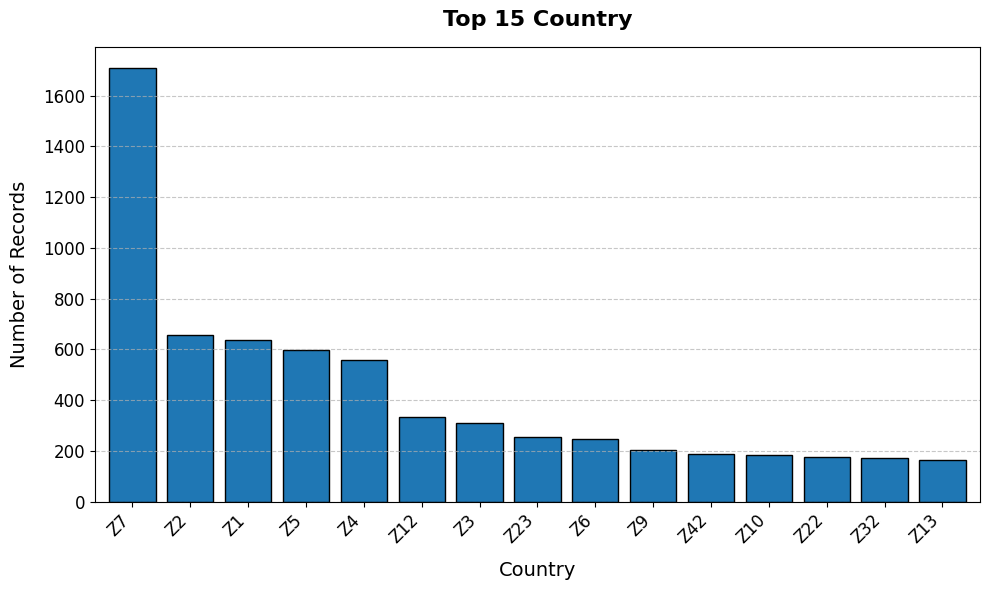

In [18]:
plot_value_counts_bar(data, "country", top_n=15)

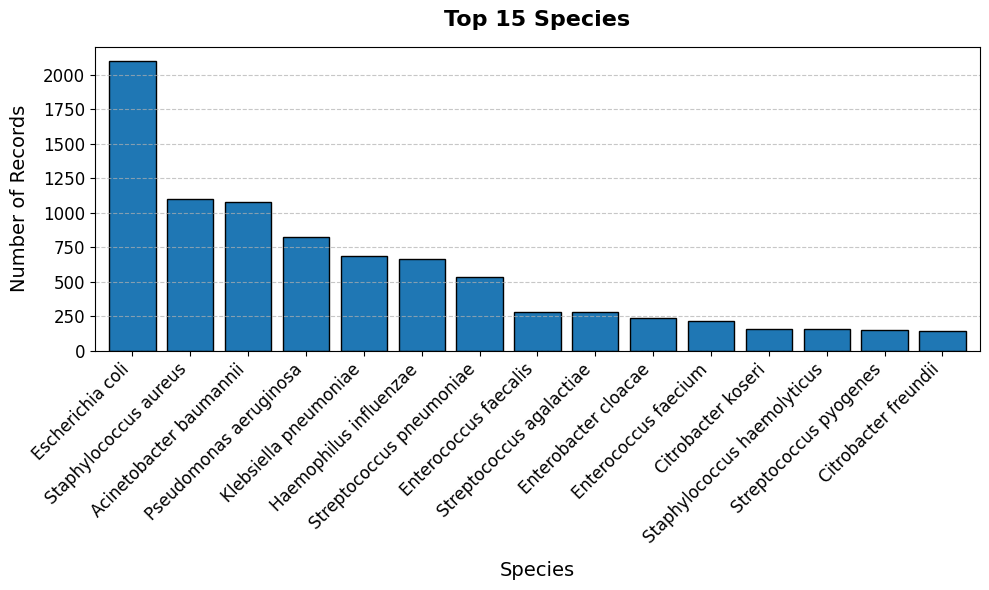

In [19]:
plot_value_counts_bar(data, "species", top_n=15)

In [20]:
data["species"].value_counts().head(20)

,count
species,
Escherichia coli,2099
Staphylococcus aureus,1097
Acinetobacter baumannii,1080
Pseudomonas aeruginosa,822
Klebsiella pneumoniae,689
Haemophilus influenzae,668
Streptococcus pneumoniae,531
Enterococcus faecalis,281
Streptococcus agalactiae,279


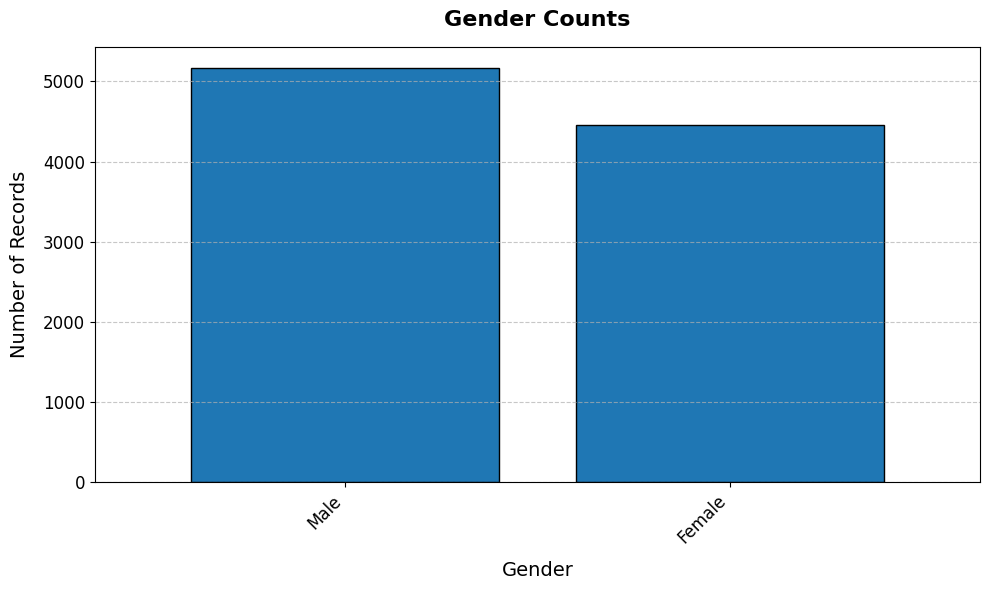

In [21]:
plot_value_counts_bar(data, "gender", top_n=None)

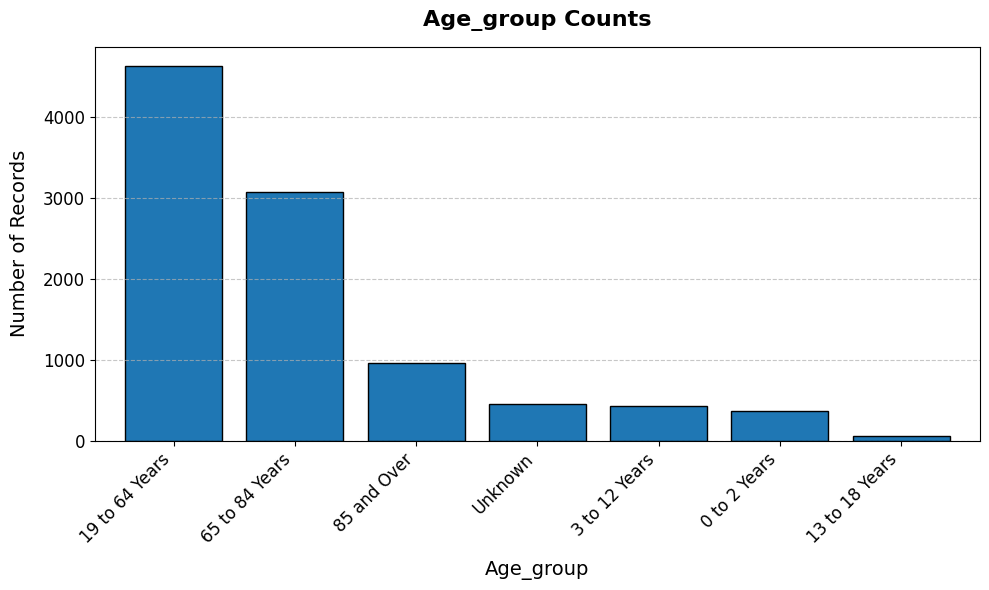

In [22]:
plot_value_counts_bar(data, "age_group", top_n=None)

In [23]:
data["year"].value_counts().sort_index()

,count
year,
2004,218
2005,237
2006,327
2007,434
2008,400
2009,457
2010,350
2011,280
2012,556


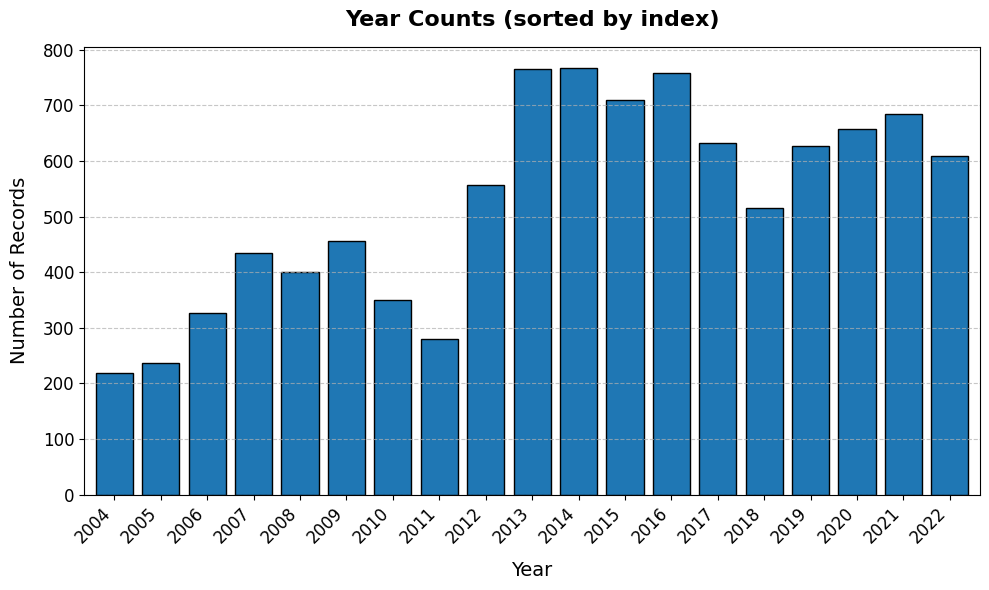

In [24]:
plot_value_counts_bar(data, "year", top_n=None, sort_index=True)

In [25]:
data["source"].value_counts()

,count
source,
Blood,1940
Wound,1429
Sputum,1362
Urine,1280
Endotracheal aspirate,434
...,...
Fallopian Tubes,1
Nails,1
Ovary,1


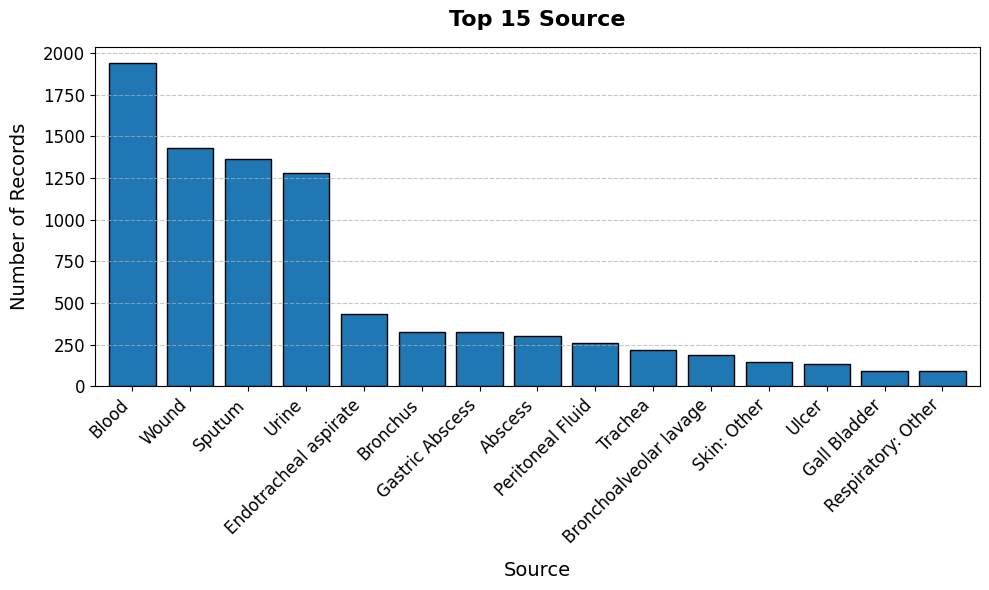

In [26]:
plot_value_counts_bar(data, "source", top_n=15)

In [27]:
data_region= data[data["country"] == "Z7"]

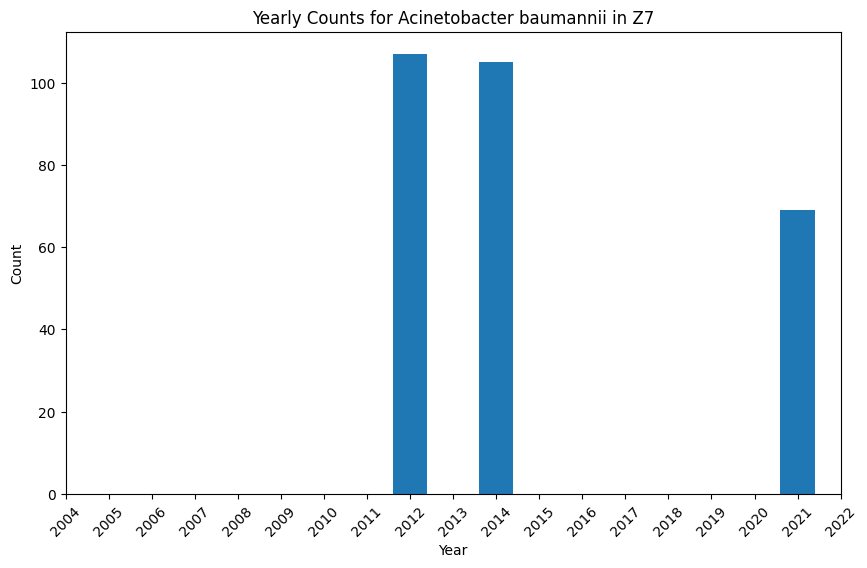

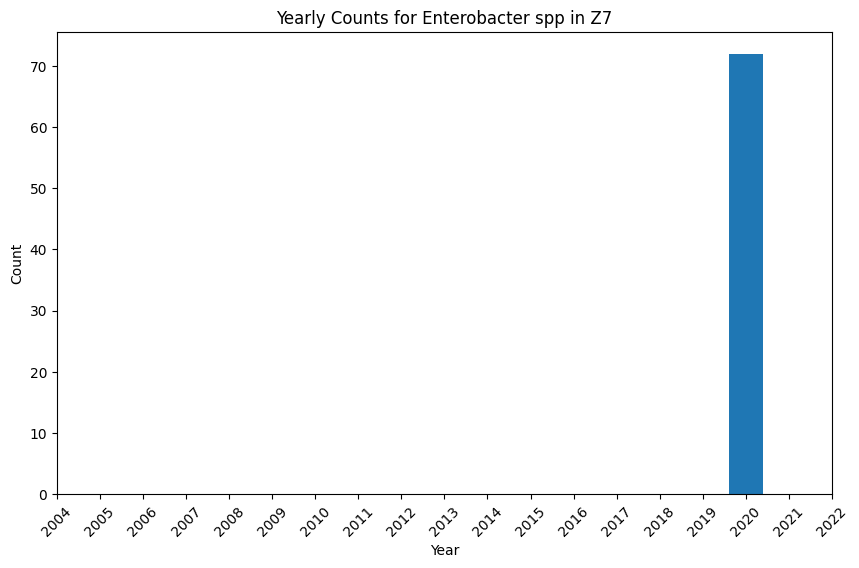

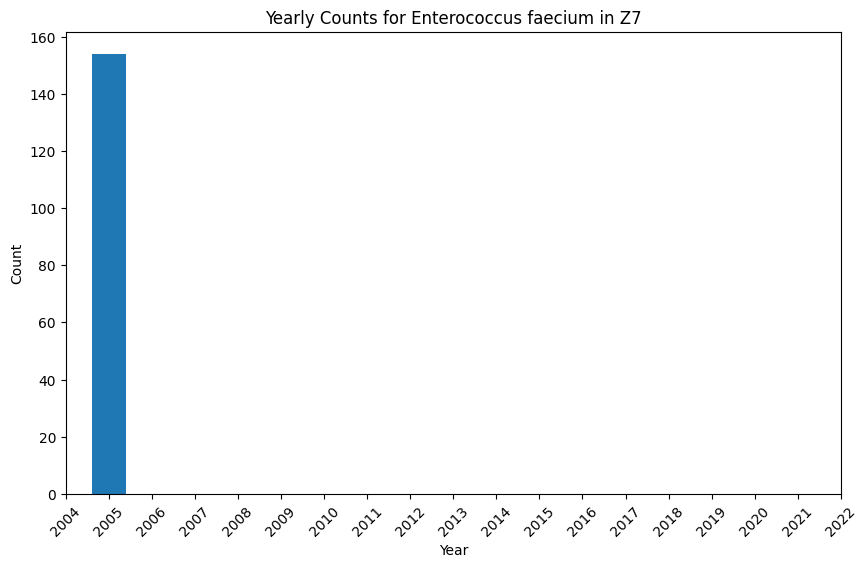

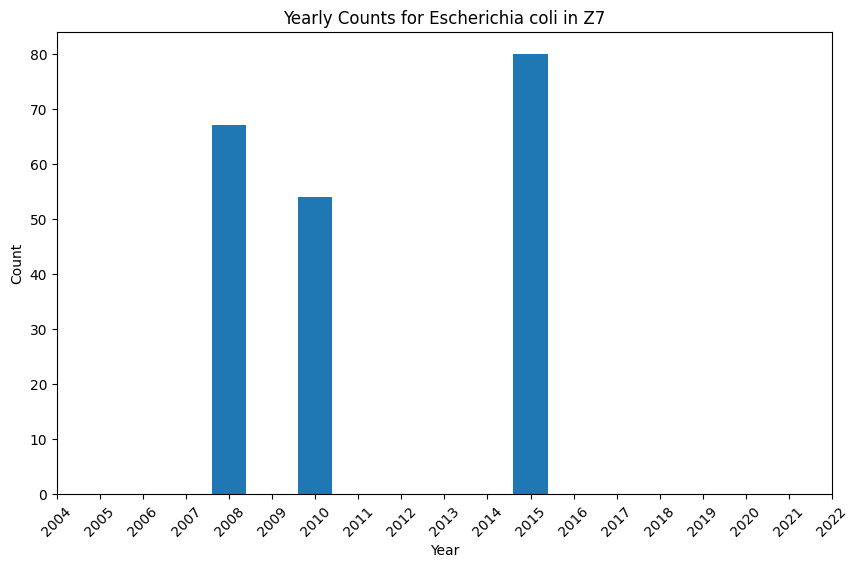

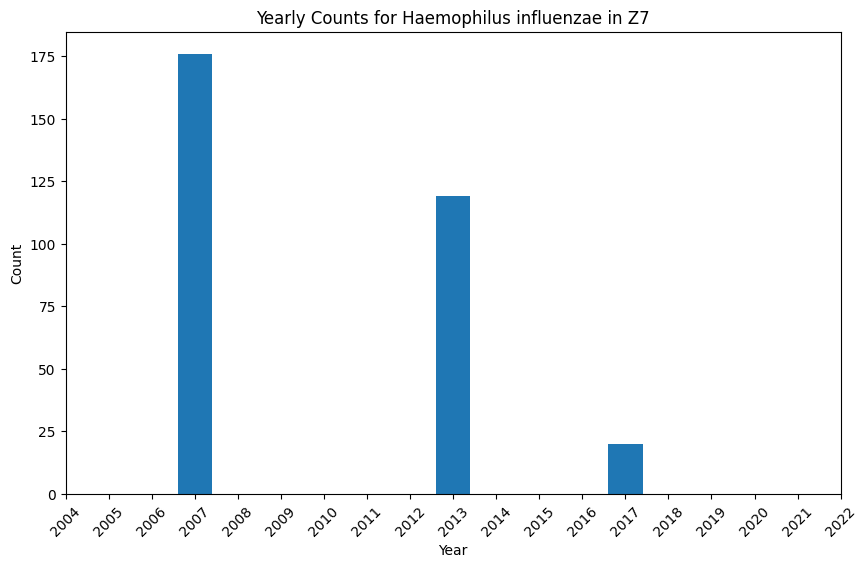

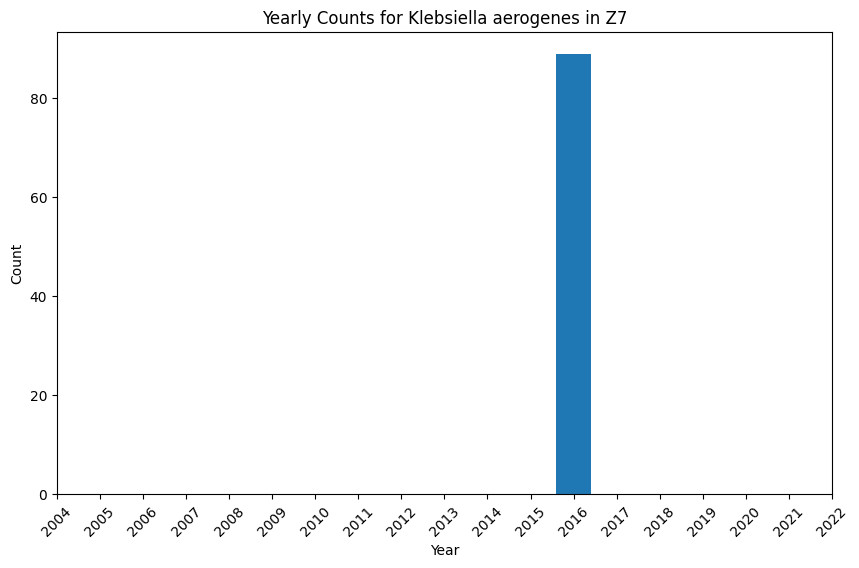

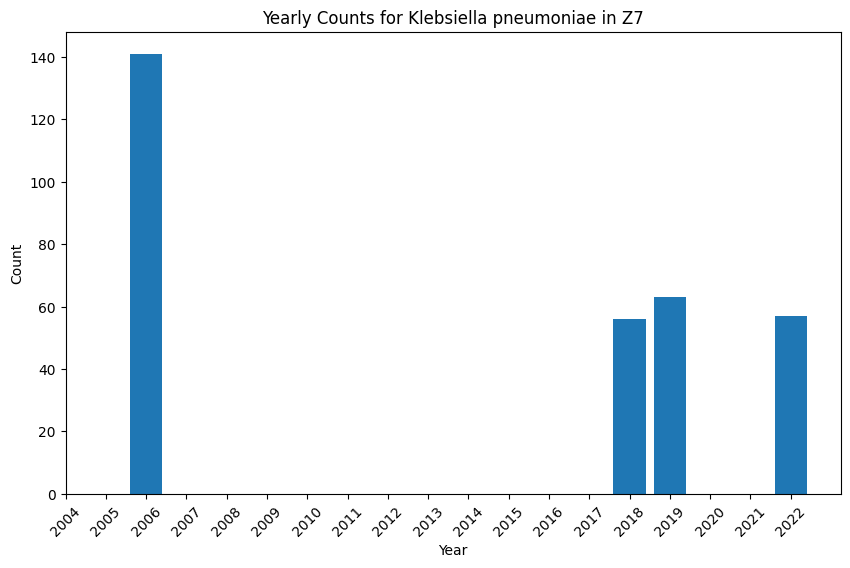

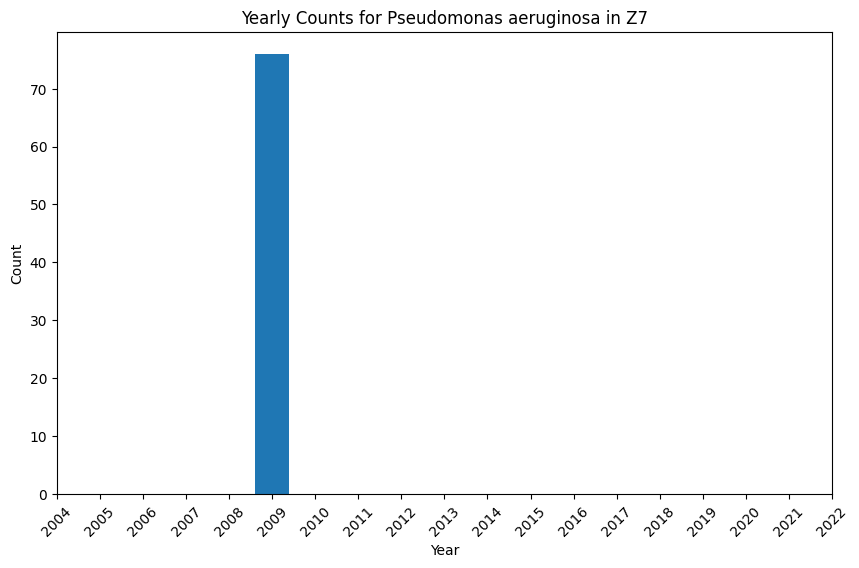

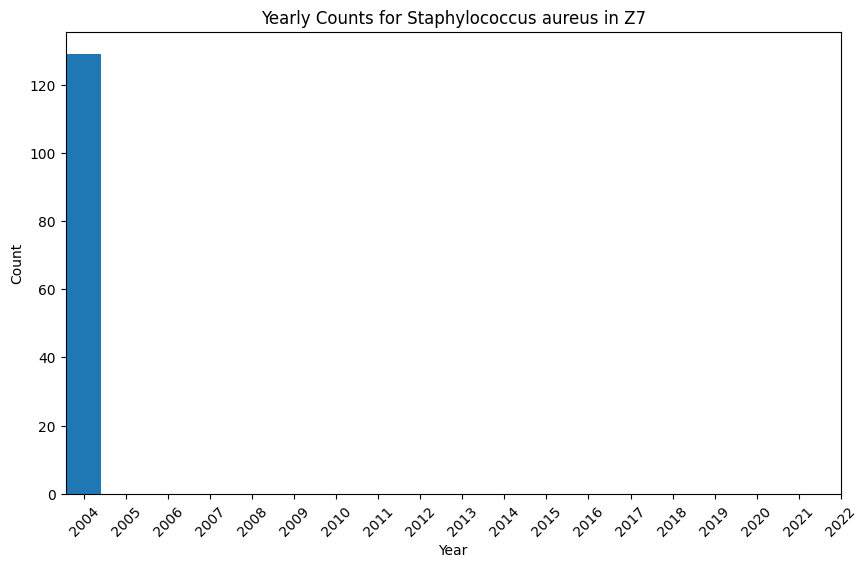

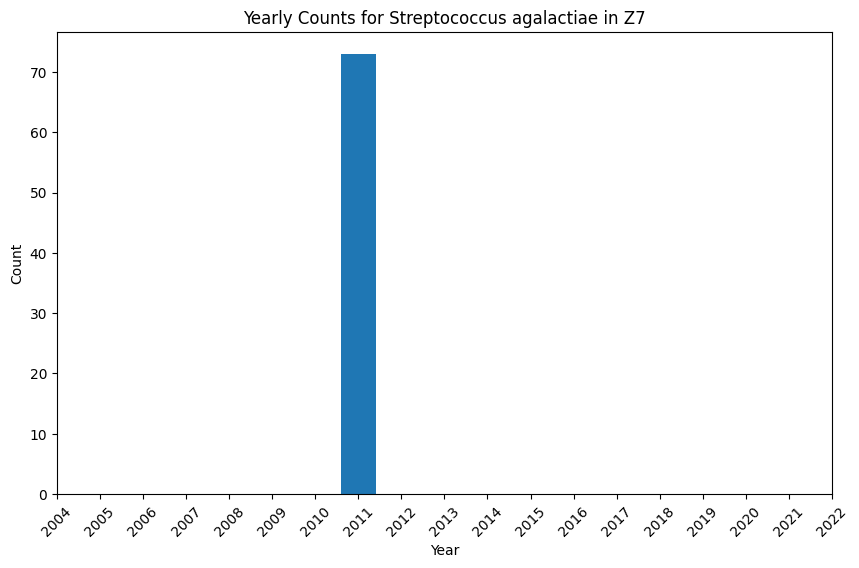

In [29]:
data_region_grouped = (data_region.groupby(['species','year']).size().reset_index(name='count'))

#print(data_region_grouped)

unique_species = data_region_grouped['species'].unique()
all_years      = sorted(data_region_grouped['year'].unique())

for species in unique_species:
    species_data = data_region_grouped[data_region_grouped['species'] == species]

    plt.figure(figsize=(10,6))
    plt.bar(species_data['year'], species_data['count'])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Yearly Counts for {species} in Z7')
    plt.xticks(all_years, rotation=45)
    plt.show()


<Figure size 1500x1000 with 0 Axes>

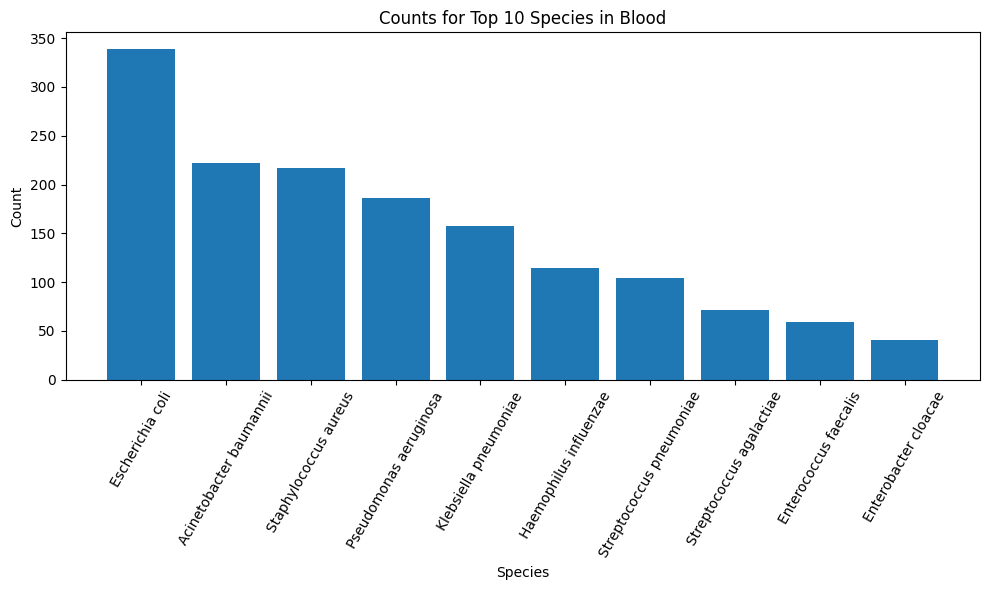

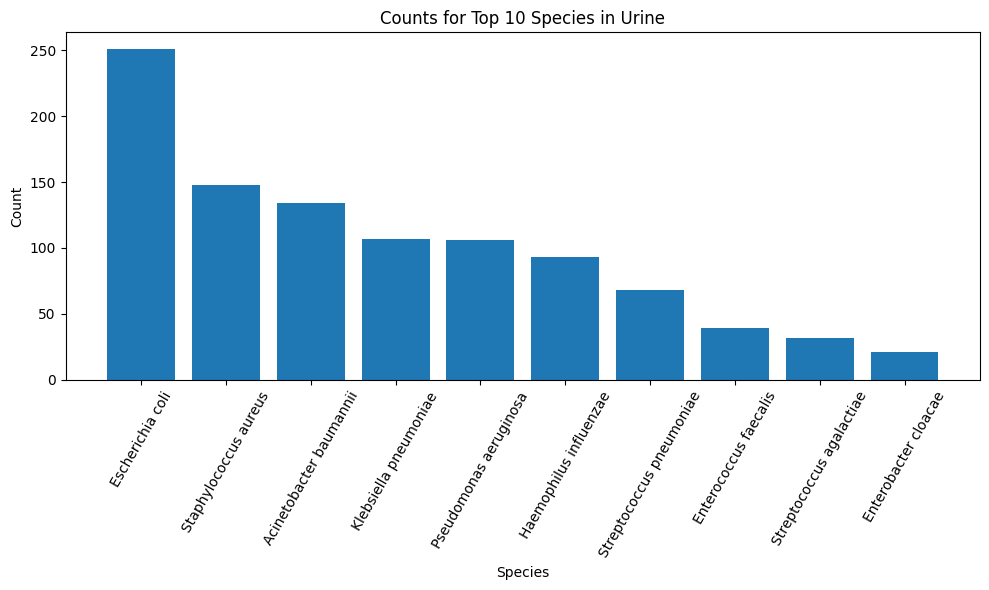

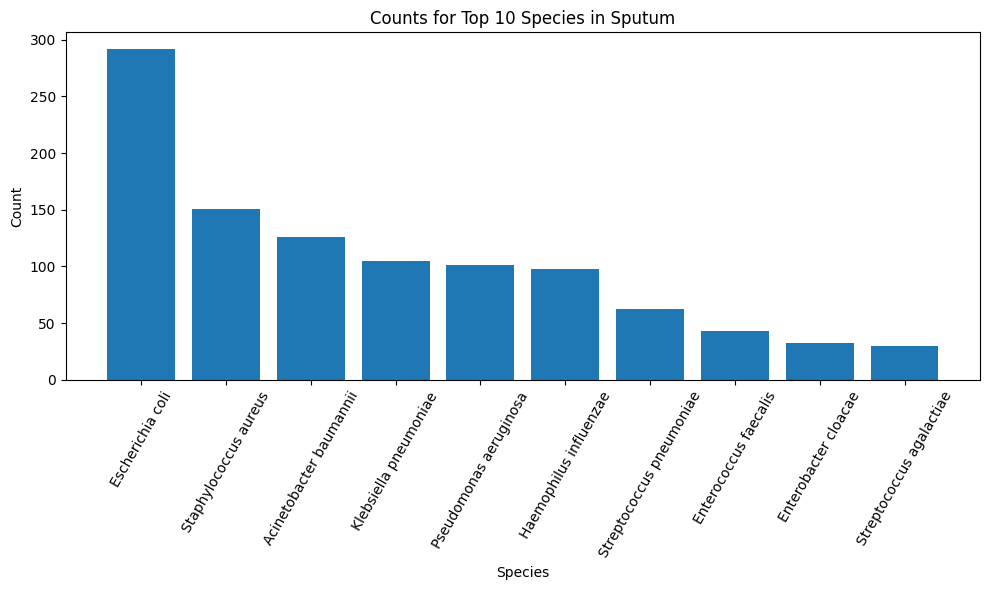

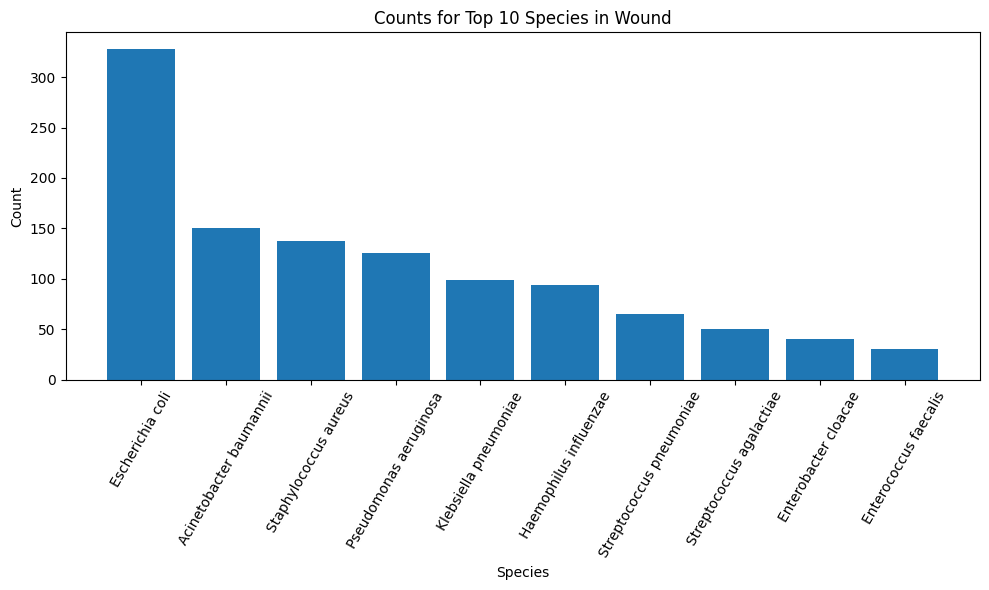

In [30]:
data_sample_org_grouped = data.groupby(['species', 'source']).size().reset_index(name='count')

plt.figure(figsize=(15, 10))

top_10_species = data_sample_org_grouped['species'].value_counts().nlargest(10).index

sources = ['Blood', 'Urine', 'Sputum', 'Wound']

for source in sources:
    # Filter the data for the current source and only include top 10 species
    species_data = data_sample_org_grouped[
        (data_sample_org_grouped['source'] == source) &
        (data_sample_org_grouped['species'].isin(top_10_species))
    ].sort_values('count', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(species_data['species'], species_data['count'])

    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.title(f'Counts for Top 10 Species in {source}')

    plt.xticks(rotation=60)
    plt.tight_layout()
    plt.show()


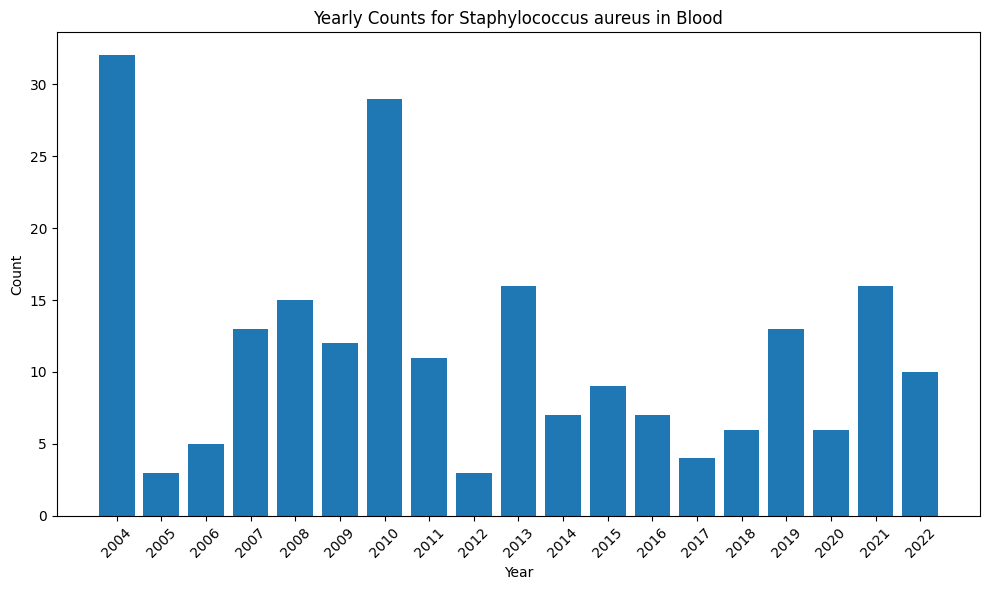

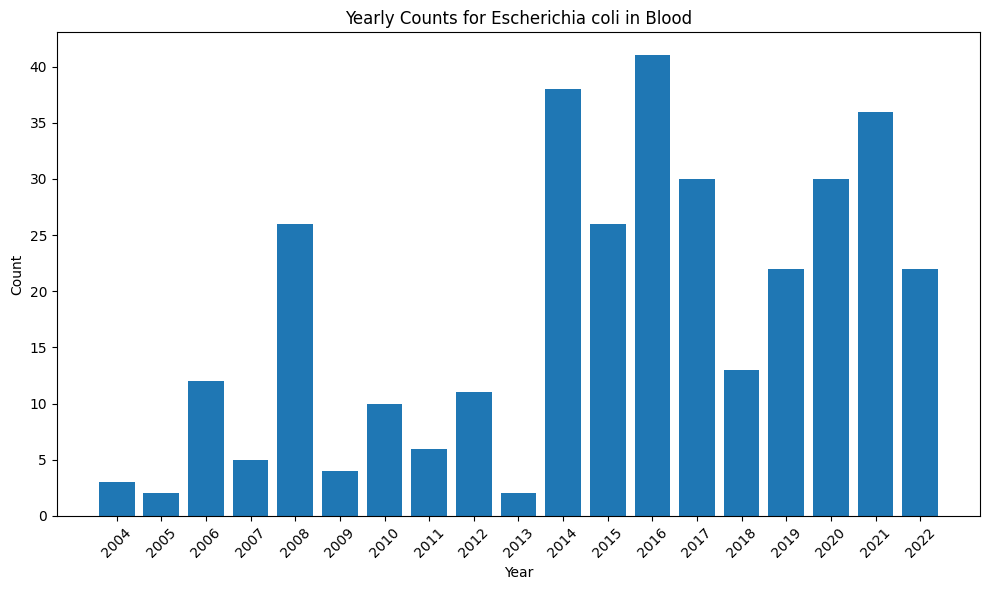

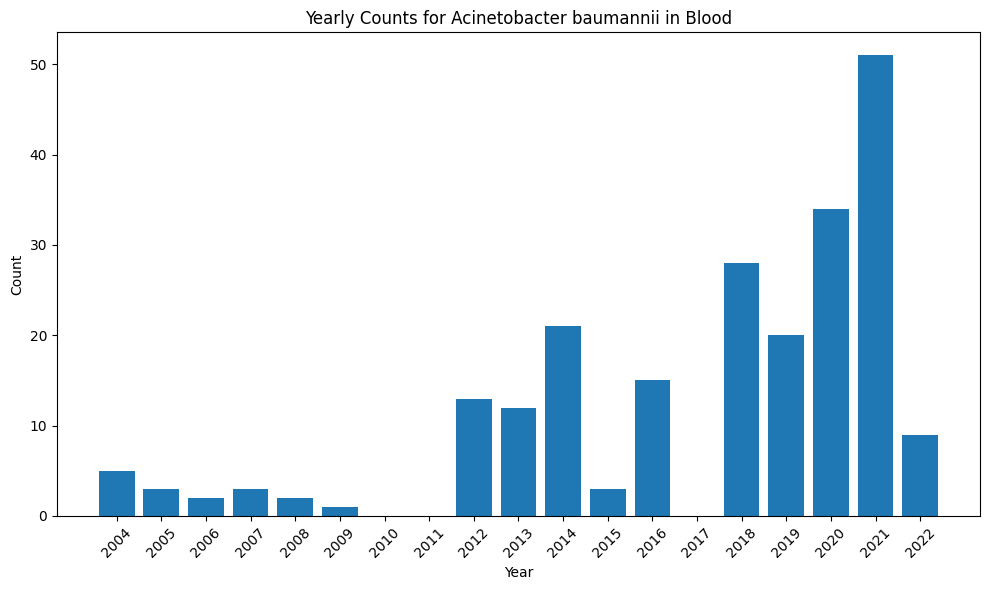

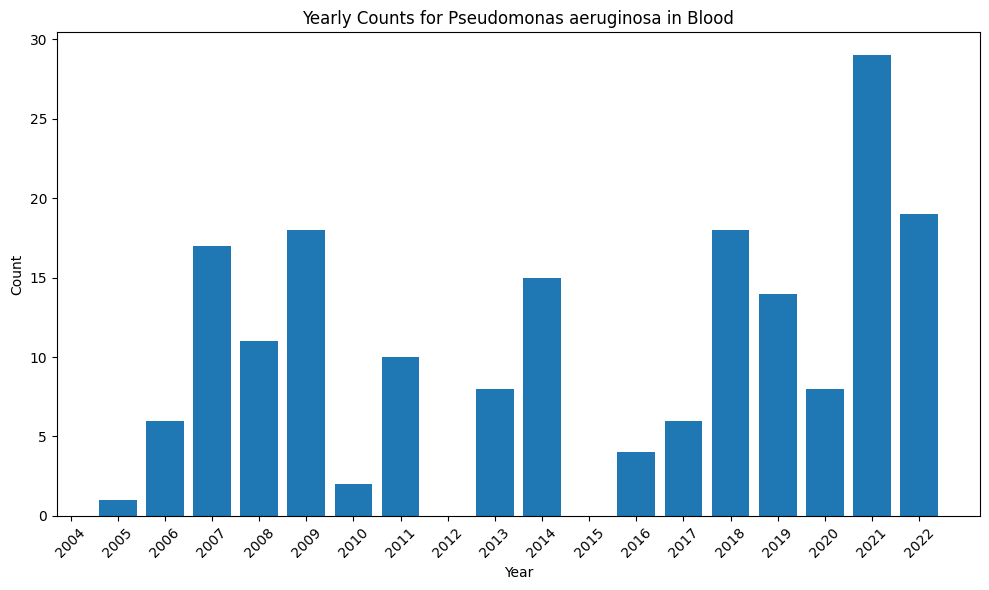

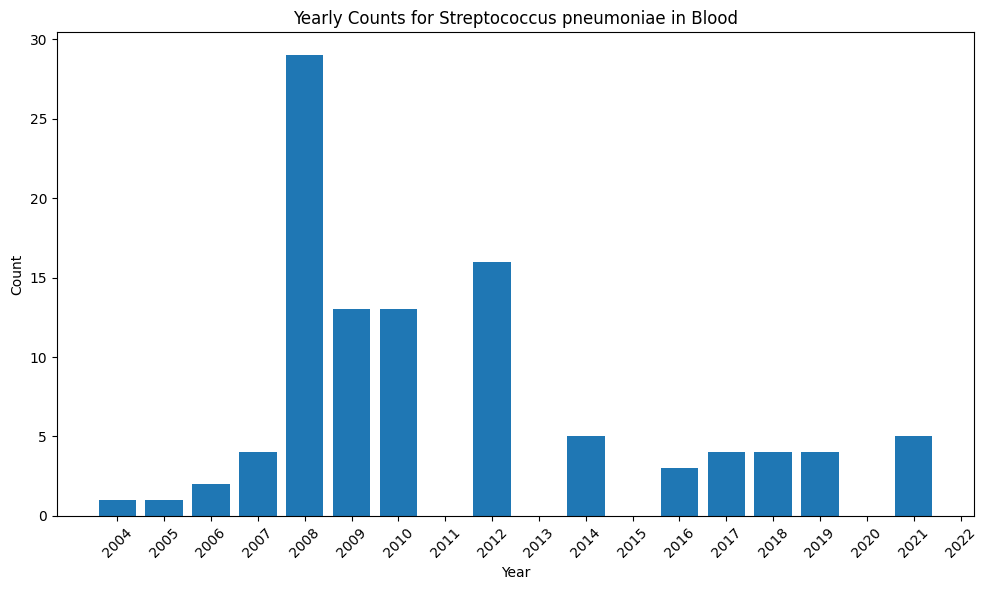

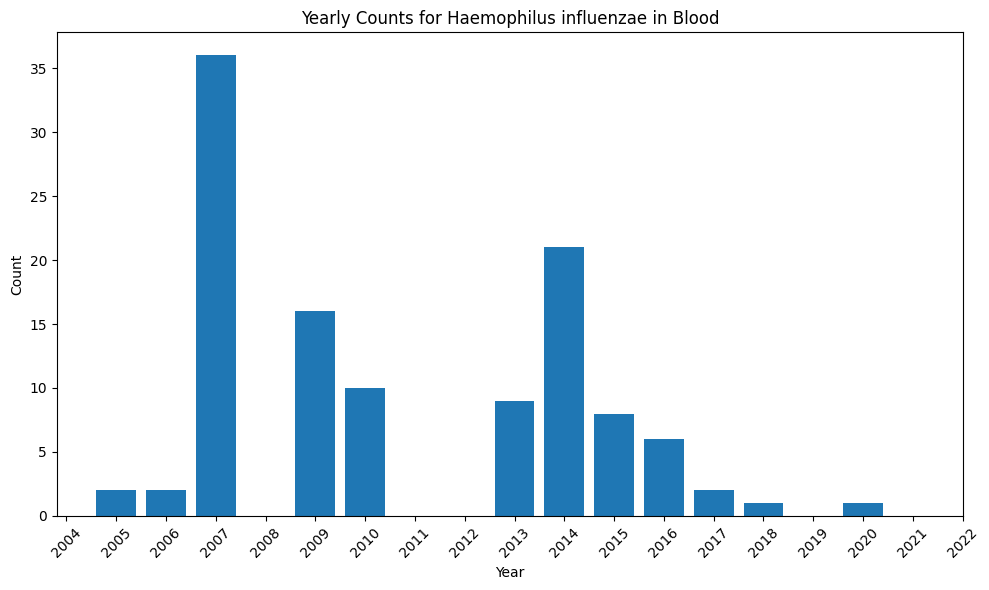

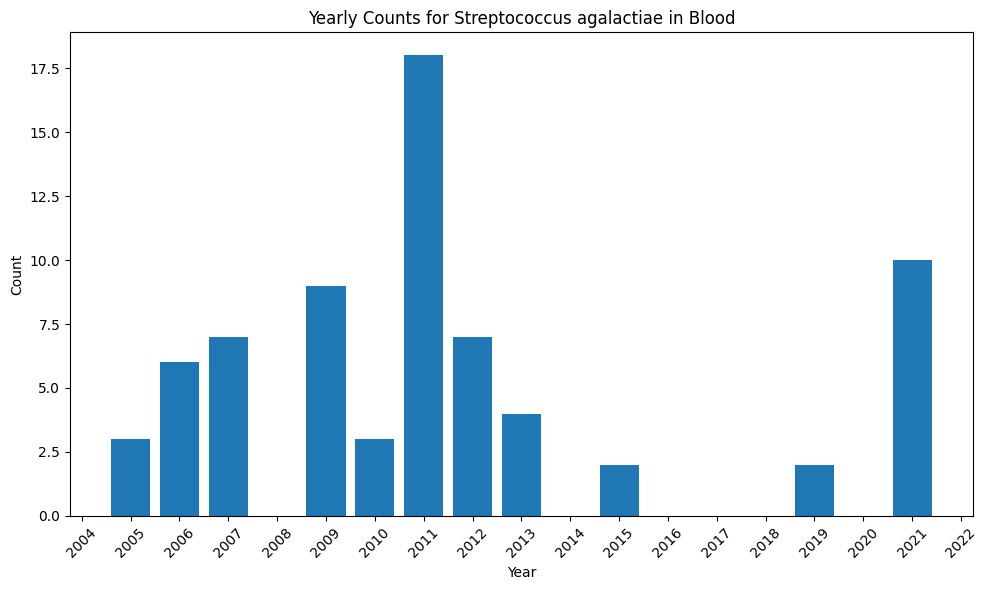

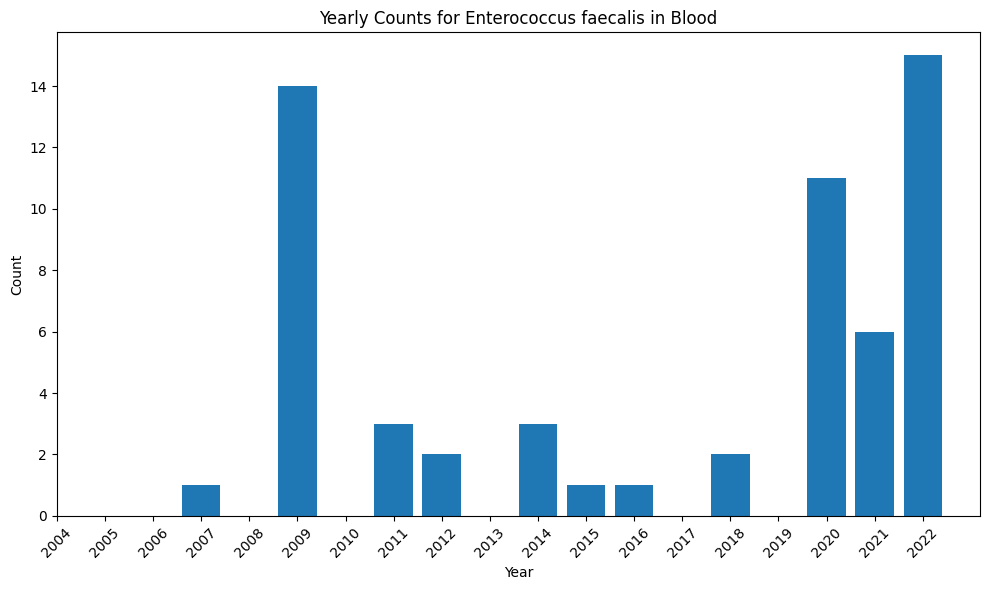

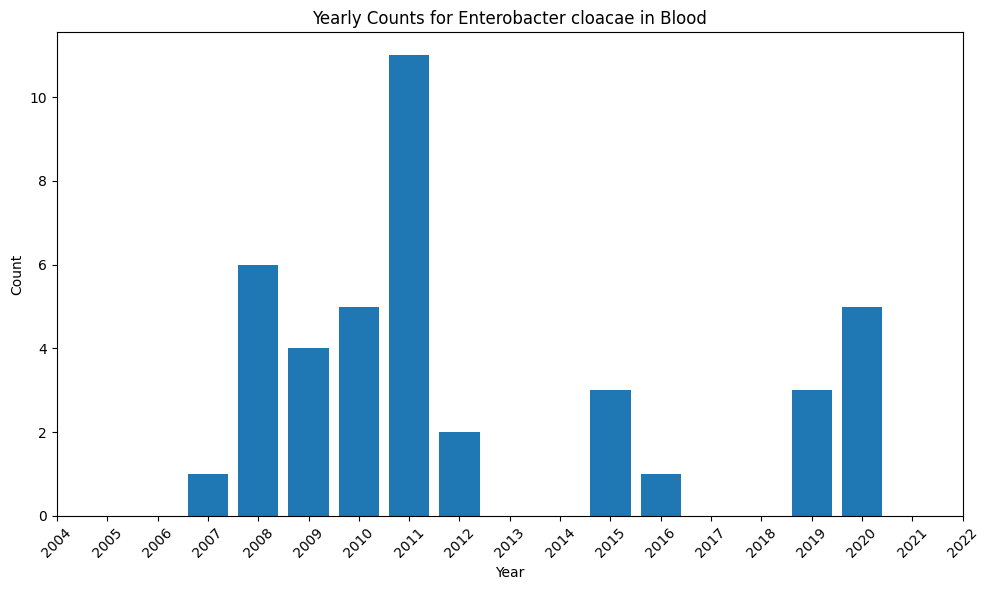

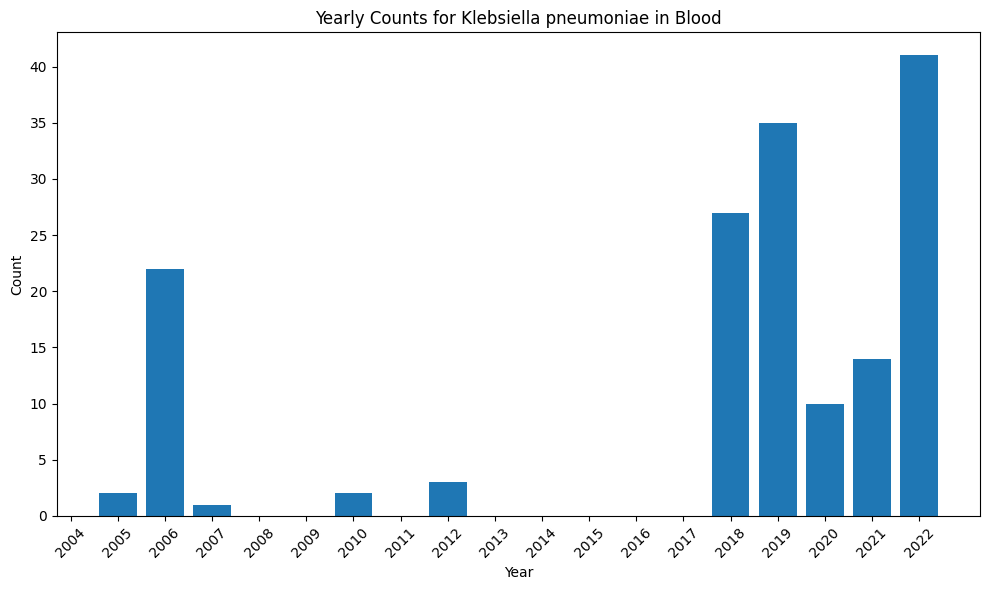

In [31]:
data_blood = data[data["source"] == "Blood"]

# Group the data by Species and Year, and calculate the counts
data_blood_org_grouped = data_blood.groupby(['species', 'year']).size().reset_index(name='count')

# Get the top 10 species based on their overall counts
top_10_species = data_blood_org_grouped['species'].value_counts().nlargest(10).index

# Get all unique years for consistent x-axis ticks
all_years = sorted(data_blood_org_grouped['year'].unique())

# Loop through each species in the top 10 and create a separate plot for each
for species in top_10_species:
    # Filter the data for the current species
    species_data = data_blood_org_grouped[data_blood_org_grouped['species'] == species].sort_values('count', ascending=False)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(species_data['year'], species_data['count'])

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Yearly Counts for {species} in Blood')
    plt.xticks(ticks=all_years, rotation=45)

    plt.tight_layout()
    plt.show()

In [32]:
def custom_aggregate_number(series, susceptibility="Resistant"):
    unique_counts = series.value_counts(normalize=False)
    total_count = pd.Series.sum(unique_counts)
    return str(unique_counts[susceptibility])+ "/" + str(total_count) if susceptibility in unique_counts else np.nan

def custom_aggregate(series, susceptibility="Resistant"):
    unique_counts = round(series.value_counts(normalize=True) * 100, 2)
    return unique_counts[susceptibility] if susceptibility in unique_counts else np.nan


antibiotics = ["amikacin_i", "amoxycillin_clavulanate_i", "ampicillin_i", "cefepime_i", "ceftazidime_i", "ceftriaxone_i", "imipenem_i", "levofloxacin_i", "meropenem_i"]

organisms = ["Escherichia coli", "Klebsiella pneumoniae"]

for organism in organisms:
    print("Processing.....................................", organism)
    data_blood_org = data_blood[data_blood["species"] == organism]
    for antibiotic in antibiotics:
        result = data_blood_org[antibiotic].agg(custom_aggregate_number)
        result2 = data_blood_org[antibiotic].agg(custom_aggregate)
        print(antibiotic + ", " + str(result) + "(" + str(result2)+ ") " )

Processing..................................... Escherichia coli
amikacin_i, 18/201(8.96) 
amoxycillin_clavulanate_i, 50/165(30.3) 
ampicillin_i, 128/186(68.82) 
cefepime_i, 36/219(16.44) 
ceftazidime_i, 54/201(26.87) 
ceftriaxone_i, 20/127(15.75) 
imipenem_i, 17/131(12.98) 
levofloxacin_i, 88/337(26.11) 
meropenem_i, 24/239(10.04) 
Processing..................................... Klebsiella pneumoniae
amikacin_i, 14/106(13.21) 
amoxycillin_clavulanate_i, 22/71(30.99) 
ampicillin_i, 46/76(60.53) 
cefepime_i, 15/104(14.42) 
ceftazidime_i, 19/89(21.35) 
ceftriaxone_i, 3/30(10.0) 
imipenem_i, 24/96(25.0) 
levofloxacin_i, 42/155(27.1) 
meropenem_i, 18/105(17.14) 


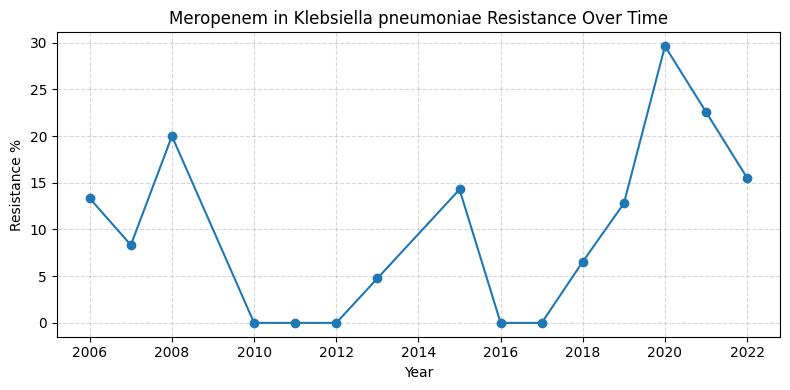

In [33]:
def calc_resistance(data, col):
    """
    Calculate total resistant count and yearly resistance percentage.
    """
    yearly = (
        data.groupby('year')[col]
            .agg(
                resistant=lambda x: (x == 'Resistant').sum(),
                total='count'
            )
            .reset_index()
    )
    yearly['pct'] = yearly['resistant'] / yearly['total'] * 100
    return yearly


def plot_trend(yearly, label):

    years = yearly['year'].to_numpy()
    pct   = yearly['pct'].to_numpy()

    plt.figure(figsize=(8, 4))
    plt.plot(years, pct, marker='o')
    plt.title(f"{label} Resistance Over Time")
    plt.xlabel("Year")
    plt.ylabel("Resistance %")
    plt.grid(True, ls='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


df_year = calc_resistance(data.query("species=='Klebsiella pneumoniae'"), 'meropenem_i')
plot_trend(df_year, 'Meropenem in Klebsiella pneumoniae')